In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from prettytable import PrettyTable
from sklearn.cross_validation import train_test_split
import numpy as np
from sklearn.metrics import roc_curve, auc,roc_auc_score,f1_score,confusion_matrix
print (__doc__)

Automatically created module for IPython interactive environment


In [25]:
filename="../preprocessed/amlodipine_no_blood.csv"
f = open(filename)
f.readline()
data = np.loadtxt(fname = f, delimiter = ',',dtype='double')
Y = data[:,0]
X = data[:, 1:data.shape[1]]

# Reading the labels now
f= open(filename)
labels_=np.loadtxt(fname=f,delimiter=',',dtype='string')
labels_=labels_[0,1:]

In [26]:
print 'X: ',X,'\nY: ',Y

X:  [[  1.   1.   1.   1.  70.]
 [  1.   1.   1.   1.  66.]
 [  2.   1.   1.   1.  70.]
 [  1.   1.   1.   1.  68.]
 [  1.   2.   1.   1.  75.]
 [  1.   1.   2.   1.  77.]
 [  1.   2.   1.   2.  68.]
 [  1.   1.   1.   2.  75.]
 [  1.   2.   1.   1.  60.]
 [  2.   1.   1.   1.  78.]
 [  1.   1.   1.   1.  76.]
 [  1.   1.   2.   1.  88.]
 [  1.   1.   1.   2.  76.]
 [  1.   1.   2.   1.  80.]
 [  1.   1.   1.   2.  90.]
 [  1.   1.   2.   2.  96.]
 [  2.   2.   1.   1.  90.]
 [  2.   1.   1.   1.  50.]
 [  1.   1.   1.   1.  60.]
 [  1.   1.   1.   1.  80.]
 [  1.   1.   1.   1.  80.]
 [  1.   1.   2.   1.  75.]
 [  1.   2.   2.   2.  80.]
 [  1.   2.   1.   1.  78.]
 [  1.   1.   1.   1.  75.]
 [  1.   1.   2.   2.  72.]
 [  1.   2.   2.   1.  72.]
 [  2.   1.   1.   2.  76.]
 [  2.   2.   2.   2.  70.]
 [  2.   2.   1.   1.  74.]
 [  1.   1.   2.   2.  76.]
 [  1.   1.   1.   2.  75.]
 [  1.   1.   1.   2.  78.]
 [  1.   1.   1.   1.  81.]
 [  1.   1.   1.   1.  70.]
 [  1.   1.   1.

In [27]:
# Replacing [1,3] with [0,1] for Groups 1,3 to 0,1
Y[Y==1]=0
Y[Y==3]=1

In [28]:
# Target labels are now:
print 'Y is now: ',Y

Y is now:  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


** Inorder to get scaled visualizations of data, normalization is avoided**

#Normalizing to Zero Mean Unit Variance
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3)

### Defining Function to plot Confusion matrix 

In [21]:

class_labels_=np.array(['No Edema','Edema'])
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(class_labels_))
    plt.xticks(tick_marks,class_labels_, rotation=45)
    plt.yticks(tick_marks,class_labels_)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Training a  Decision Tree Classifier

In [22]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

# Model predictions & scores
score = clf.score(X_test, y_test)
y_predic=clf.predict(X_test)


### Plotting the Metrics for the Model

Decision Tree Classification Score:  1.0

Confusion Matrix: 
[[20  0]
 [ 0 21]]

Normalized Confusion Matrix: 
[[ 1.  0.]
 [ 0.  1.]]


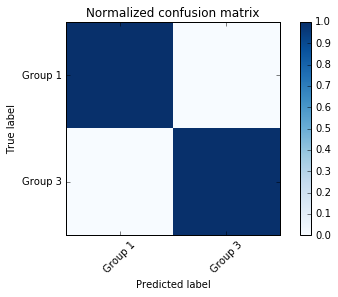

In [42]:
# Evaluation Methods here: Confusion Matrix, F1 Score
print 'Decision Tree Classification Score: ',score
cm=confusion_matrix(y_test,y_predic)
print '\nConfusion Matrix: \n',cm
np.set_printoptions(precision=2)
# Normalize the confusion matrix by row (i.e by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print '\nNormalized Confusion Matrix: \n',(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
plt.show()


## Decision Tree Visualization

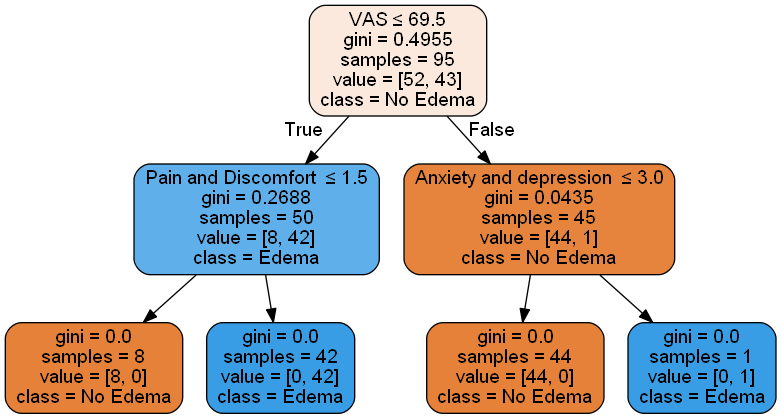

In [23]:
from sklearn.externals.six import StringIO  

import pydotplus
from IPython.display import Image  
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=labels_,  
                         class_names=class_labels_,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

## Feature Importance & Subsequent Selection



*To allow us to view the importance of various features, we train a Random Forest Classifier*
### The following visualization enables us to select only the most important features from the dataset

In [45]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf = clf.fit(X_train,y_train)

# Model predictions & scores
score = clf.score(X_test, y_test)
y_predic=clf.predict(X_test)

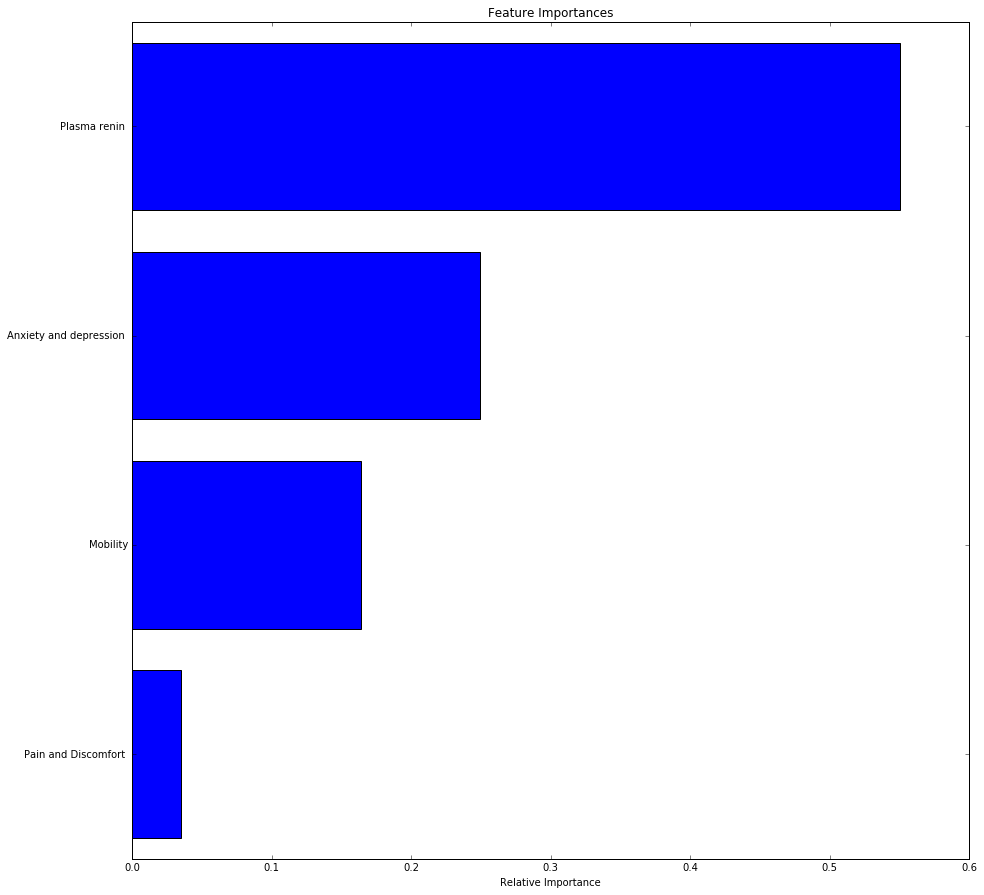

In [46]:
importances = clf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(15,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), labels_[indices])
plt.xlabel('Relative Importance')
plt.show()